In [118]:
import pandas as pd
import numpy as np
import env
import os
from pydataset import data
from scipy import stats
import math

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import my acquire and prepare modules
import acquire
import prepare

# Remove limits on viewing dataframes
pd.set_option('display.max_columns', None)

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data('iris')
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


a. print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.rename(columns = {'Sepal.Length':'sepal_length','Sepal.Width':'sepal_width','Petal.Length':'petal_length','Petal.Width':'petal_width','Species':'species'}, inplace=True)
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


b. print the number of rows and columns (shape)

In [5]:
df_iris.shape

(150, 5)

c. print the column names

In [6]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

d. print the data type of each column

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


e. print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [8]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 5. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [9]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


a. assign the first 100 rows to a new dataframe, df_excel_sample

In [10]:
df_excel_sample = df_excel.iloc[:100]

In [11]:
df_excel_sample.shape

(100, 14)

b. print the number of rows of your original dataframe

In [12]:
len(df_excel)

7049

c. print the first 5 column names

In [13]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

d. print the column names that have a data type of object

In [14]:
df_excel.columns[df_excel.dtypes == object]

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

e. compute the range for each of the numeric variables.

In [15]:
stats = df_excel[['monthly_charges', 'total_charges']].describe().T
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


### 6. Read the data from this google sheet into a dataframe, df_google

In [16]:
df_google = pd.read_csv('https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357')
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


a. print the first 3 rows

In [17]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


b. print the number of rows and columns

In [18]:
df_google.shape

(891, 12)

c. print the column names

In [19]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

d. print the data type of each column

In [20]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


e. print the summary statistics for each of the numeric variables

In [21]:
df_google[['Age','Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


f. print the unique values for each of your categorical variables

In [22]:
df_google[['Survived','Pclass','Sex','SibSp','Parch','Embarked']].nunique()

Survived    2
Pclass      3
Sex         2
SibSp       7
Parch       7
Embarked    3
dtype: int64

In [23]:
categorical = ['Survived','Pclass','Sex','Embarked']

for val in categorical:
    print(df_google[val].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [24]:
import acquire

In [25]:
acquire.get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [26]:
acquire.get_iris_data().head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [27]:
acquire.get_telco_data().head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


### Data Preparation Exercises

### Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [28]:
# Using previously created function to load iris data set
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [29]:
df.shape

(150, 6)

2. Drop the species_id and measurement_id columns.

In [30]:
# Dropping species_id column, no column named measurement_id in the data set
df = df.drop(columns='species_id')

In [31]:
df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


3. Rename the species_name column to just species.

In [32]:
df.rename(columns={'species_name':'species'},inplace=True)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [33]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

4. Create dummy variables of the species name and concatenate onto the iris dataframe.

In [34]:
# Creating boolean dummy variables for species rather than using string name
dummy_df = pd.get_dummies(df['species'], dummy_na=False)
dummy_df.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [35]:
# concatenating the dummy variable rows onto the original dataframe
df = pd.concat([df, dummy_df], axis=1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [36]:
def clean_iris():
    # this function takes in the iris data set and cleans it
    
    # drops unnecessary columns
    df = df.drop(columns='species_id')
    # renames columns for easier reading
    df.rename(columns={'species_name':'species'},inplace=True)
    # Creates boolean dummy variables for species rather than using the string version of name
    dummy_df = pd.get_dummies(df['species'], dummy_na=False, drop_first=(True))
    # concatenates dummy variable rows onto original dataframe
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [37]:
def split_iris(df):
    # this function takes in the iris data set and splits it into train, test, and validate datasets
    train, test = train_test_split(df, test_size = .2, stratify = df.species)
    train, validate = train_test_split(train, test_size = .3, stratify = train.species)
    return train, validate, test

### Using the Titanic dataset

1. Use the function defined in acquire.py to load the Titanic data.

In [38]:
# uses previously created function to load titanic data set
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


2. Drop any unnecessary, unhelpful, or duplicated columns.

In [39]:
# drops unnecessary columns
cols_to_drop = ['deck', 'embarked', 'class', 'age']
df = df.drop(columns=cols_to_drop)

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [40]:
# Creating boolean dummy variables for categorical columns rather than using string name
dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=(True,True))

In [41]:
# concatenating the dummy variable rows onto the original dataframe
df = pd.concat([df, dummy_df], axis=1)

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [42]:
def clean__titanic_data(df):
    # this function takes in the titanic data set and cleans it
    
    # dropping duplicate columns
    df = df.drop_duplicates()
    # dropping unnecessary columns
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    df = df.drop(columns=cols_to_drop)
    # filling nan values under embark_town column with most common value
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    # Creating boolean dummy variables for categorical columns rather than using string name
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False,drop_first=(True,True))
    # concatenating dummy variable rows onto original dataframe
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [43]:
def split_titanic_data(df):
    # this function takes in a dataframe and splits it into train, test, and validate sets
    
    # splitting entire dataframe 80/20 into train and test sets
    train, test = train_test_split(df, test_size = .2, random_state=123, stratify = df.survived)
    # splitting off 30% of train set created in previous step to create a validate set
    train, validate = train_test_split(train, test_size = .3, random_state=123, stratify = train.survived)
    return train, validate, test

In [44]:
def impute_mode_titanic(train, validate, test):
    # this function takes in the titanic train, validate, and test data sets and imputes the nans in the embark_town column with the most frequent value
    
    # specifying the strategy to use
    imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
    # fitting the imputer to the columns to determine most frequent value then calling transform to fill in empty values
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.fit_transform(validate[['embark_town']])
    test[['embark_town']] = imputer.fit_transform(test[['embark_town']])
    return train, validate, test

In [45]:
def prep_titanic_data(df):
    # this function takes in a dataframe and applies other functions to clean and split the data
    df = clean_titanic_data(df)
    train, validate, test = split_titanic_data(df)
    return train, validate, test

### Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.

In [46]:
# using predefined function to pull in telco data
df = acquire.get_telco_data()
df.head(5)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [47]:
# changing setting to show all columns
pd.set_option('display.max_columns', None)

In [48]:
# checking # of rows and columns
df.shape

(7043, 24)

In [49]:
# checking out data types and if there are any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [50]:
# changing data type for total charges from string to float
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce')

In [51]:
df.total_charges.dtype

dtype('float64')

In [52]:
# dropping rows where new customers have not yet had opportunity to churn
df = df[df.total_charges.notnull()]
df.shape

(7032, 24)

In [53]:
# checking for outliers and statistical information
df[['monthly_charges', 'total_charges']].describe()

,monthly_charges,total_charges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


In [54]:
# checking column names
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [55]:
# checking categorical column values
col_list = df.columns.tolist()
for col in col_list:
    if col not in ['customer_id', 'tenure', 'monthly_charges', 'total_charges']:
        print(df[col].value_counts(dropna=False))

1    2365
2    1604
3    1542
4    1521
Name: payment_type_id, dtype: int64
2    3096
1    2416
3    1520
Name: internet_service_type_id, dtype: int64
1    3875
3    1685
2    1472
Name: contract_type_id, dtype: int64
Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: senior_citizen, dtype: int64
No     3639
Yes    3393
Name: partner, dtype: int64
No     4933
Yes    2099
Name: dependents, dtype: int64
Yes    6352
No      680
Name: phone_service, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64
No                     3472
Yes    

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [56]:
# dropping unnecessary or duplicated columns
df = df.drop_duplicates()
df.shape

(7032, 24)

In [57]:
cols_to_drop = ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'phone_service']
df = df.drop(columns=cols_to_drop)

In [58]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,Male,0,No,No,54,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,Female,0,No,No,56,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
3,Male,0,Yes,Yes,20,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic)
4,Male,0,Yes,No,72,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic)


In [59]:
# replacing information included in another column to simplify encoding
df.replace('No internet service', 'No', inplace=True)
df.online_security.value_counts()

No     5017
Yes    2015
Name: online_security, dtype: int64

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [60]:
# creating df of dummy variables for columns with two values, dropping first
dummy_df1 = pd.get_dummies(df[['gender', 'partner', 'dependents', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn']], drop_first=True)

In [61]:
# creating df of dummy variables for columns with more than two values, keeping all columns for clarity
dummy_df2 = pd.get_dummies(df[['contract_type', 'internet_service_type', 'payment_type']])

In [62]:
# concatenating dummy variable dfs onto original dataframe
df = pd.concat([df, dummy_df1, dummy_df2], axis=1)

In [63]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Male,partner_Yes,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1
1,Male,0,No,No,54,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0
2,Female,0,No,No,56,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,Male,0,Yes,Yes,20,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic),1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,Male,0,Yes,No,72,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),1,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,0,0


In [64]:
# checking shape to see if changes were made
df.shape

(7032, 42)

In [65]:
# checking column names
df.columns.tolist()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [66]:
# renaming columns for clarity
df.rename(columns={
                'gender_Male': 'is_male',
                'partner_Yes': 'with_partner',
                'dependents_Yes': 'with_dependents',
                'multiple_lines_No phone service': 'no_phone_service',
                'multiple_lines_Yes': 'multiple_lines',
                'online_security_Yes': 'online_security',
                'online_backup_Yes': 'online_backup',
                'device_protection_Yes': 'device_protection',
                'tech_support_Yes': 'tech_support',
                'streaming_tv_Yes': 'streaming_tv',
                'streaming_movies_Yes': 'streaming_movies',
                'paperless_billing_Yes': 'paperless_billing',
                'churn_Yes': 'has_churned',
                'contract_type_Month-to-month': 'month_to_month_contract',
                'contract_type_One year': 'one_year_contract',
                'contract_type_Two year': 'two_year_contract',
                'internet_service_type_DSL': 'dsl_internet',
                'internet_service_type_Fiber optic': 'fiber_optic_internet',
                'internet_service_type_None': 'no_internet_service',
                'payment_type_Bank transfer (automatic)': 'bank_transfer_payment_automatic',
                'payment_type_Credit card (automatic)': 'credit_card_payment_automatic',
                'payment_type_Electronic check': 'electronic_check_payment',
                'payment_type_Mailed check': 'mailed_check_payment'}, inplace=True)

In [67]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,is_male,with_partner,with_dependents,no_phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,has_churned,month_to_month_contract,one_year_contract,two_year_contract,dsl_internet,fiber_optic_internet,no_internet_service,bank_transfer_payment_automatic,credit_card_payment_automatic,electronic_check_payment,mailed_check_payment
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1
1,Male,0,No,No,54,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0
2,Female,0,No,No,56,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic),0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,Male,0,Yes,Yes,20,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic),1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,Male,0,Yes,No,72,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic),1,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,0,0


In [68]:
def clean_telco_data(df):
    # this function takes in the telco data and cleans it
    
    # changing data type for total charges from string to float
    df.total_charges = pd.to_numeric(df.total_charges, errors='coerce')
    # dropping rows where new customers have not yet had opportunity to churn
    df = df[df.total_charges.notnull()]
    # dropping duplicates
    df = df.drop_duplicates()
    # dropping columns that are unnecessary or where info is duplicated in another column
    cols_to_drop = ['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'phone_service']
    df = df.drop(columns=cols_to_drop)
    # replacing information included in another column to simplify encoding (creates only two values)
    df.replace('No internet service', 'No', inplace=True)
    
    # creating df of dummy variables for columns with two values, dropping first
    dummy_df1 = pd.get_dummies(df[['gender', 'partner', 'dependents', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn']], drop_first=True)
    # creating df of dummy variables for columns with more than two values, keeping all columns for clarity
    dummy_df2 = pd.get_dummies(df[['contract_type', 'internet_service_type', 'payment_type']])
    # concatenating dummy variable dfs onto original dataframe
    df = pd.concat([df, dummy_df1, dummy_df2], axis=1)
    
    # renaming columns for clarity
    df.rename(columns={
                'gender_Male': 'is_male',
                'partner_Yes': 'with_partner',
                'dependents_Yes': 'with_dependents',
                'multiple_lines_No phone service': 'no_phone_service',
                'multiple_lines_Yes': 'multiple_lines',
                'online_security_Yes': 'online_security',
                'online_backup_Yes': 'online_backup',
                'device_protection_Yes': 'device_protection',
                'tech_support_Yes': 'tech_support',
                'streaming_tv_Yes': 'streaming_tv',
                'streaming_movies_Yes': 'streaming_movies',
                'paperless_billing_Yes': 'paperless_billing',
                'churn_Yes': 'has_churned',
                'contract_type_Month-to-month': 'month_to_month_contract',
                'contract_type_One year': 'one_year_contract',
                'contract_type_Two year': 'two_year_contract',
                'internet_service_type_DSL': 'dsl_internet',
                'internet_service_type_Fiber optic': 'fiber_optic_internet',
                'internet_service_type_None': 'no_internet_service',
                'payment_type_Bank transfer (automatic)': 'bank_transfer_payment_automatic',
                'payment_type_Credit card (automatic)': 'credit_card_payment_automatic',
                'payment_type_Electronic check': 'electronic_check_payment',
                'payment_type_Mailed check': 'mailed_check_payment'}, inplace=True)
    return df

In [69]:
def split_telco_data(df):
   # this function takes in telco df with churn as stratify variable and returns train, validate, and test dfs
    train, test = train_test_split(df, test_size = .2, stratify = df.churn)
    train, validate = train_test_split(train, test_size = .3, stratify = train.churn)
    return train, validate, test

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [70]:
def prep_telco_data(df):
    # this function takes in telco df and cleans and splits it to prepare for exploring
    df = clean_telco_data(df)
    train, validate, test = split_telco_data(df)
    return train, validate, test

In [71]:
# checking if function works
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [72]:
train, validate, test = prep_telco_data(df)
print(train.shape)
print(validate.shape)
print(test.shape)

(3937, 42)
(1688, 42)
(1407, 42)


## Exploratory Analysis Exercises Part I

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [85]:
# pulling in iris data
df = acquire.get_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [86]:
# using previously defined function to clean and split iris data
train, validate, test = prepare.prep_iris_data(df)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
34,setosa,4.9,3.1,1.5,0.2,1,0,0
144,virginica,6.7,3.3,5.7,2.5,0,0,1
111,virginica,6.4,2.7,5.3,1.9,0,0,1
136,virginica,6.3,3.4,5.6,2.4,0,0,1
35,setosa,5.0,3.2,1.2,0.2,1,0,0


**2. Univariate Stats**

a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [87]:
quantitative_cols = ['sepal_length','sepal_width','petal_length','petal_width']
for col in quantitative_cols:
    print(f'{train[col].describe()}\n')

count    84.000000
mean      5.792857
std       0.739226
min       4.400000
25%       5.175000
50%       5.700000
75%       6.400000
max       7.700000
Name: sepal_length, dtype: float64

count    84.000000
mean      3.046429
std       0.424958
min       2.200000
25%       2.775000
50%       3.000000
75%       3.300000
max       4.100000
Name: sepal_width, dtype: float64

count    84.000000
mean      3.719048
std       1.725812
min       1.000000
25%       1.575000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

count    84.000000
mean      1.196429
std       0.775443
min       0.100000
25%       0.200000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64



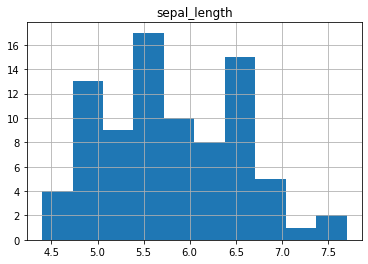

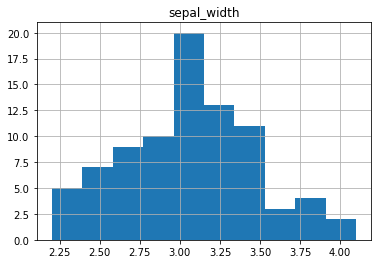

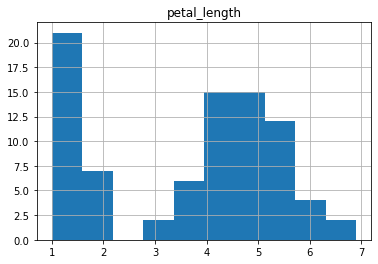

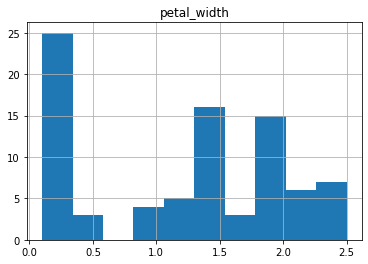

In [89]:
for col in quantitative_cols:
    train[col].hist()
    plt.title(col)
    plt.show()

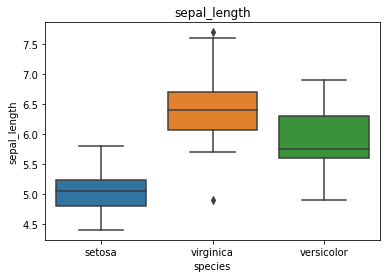

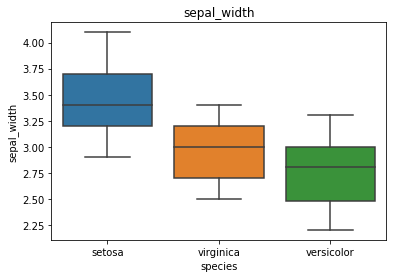

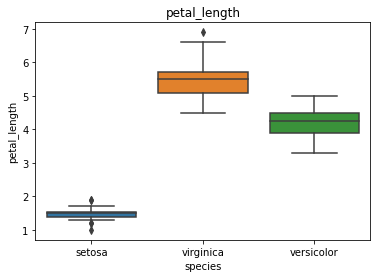

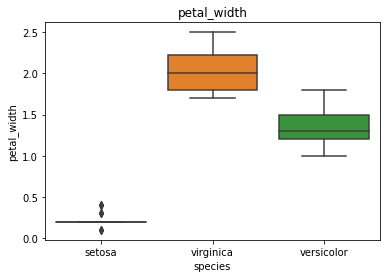

In [93]:
for col in quantitative_cols:
    sns.boxplot(y=train[col], x=train['species'])
    plt.title(col)
    plt.show()

## Need help with this
b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [99]:
train.species.value_counts()

setosa        28
versicolor    28
virginica     28
Name: species, dtype: int64

In [96]:
pd.crosstab(index=train.species, columns=train.species.count())

col_0,84
species,
setosa,28
versicolor,28
virginica,28


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

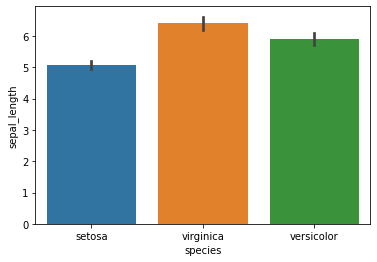

In [101]:
sns.barplot(x='species', y='sepal_length', data=train)

In [100]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
34,setosa,4.9,3.1,1.5,0.2,1,0,0
144,virginica,6.7,3.3,5.7,2.5,0,0,1
111,virginica,6.4,2.7,5.3,1.9,0,0,1
136,virginica,6.3,3.4,5.6,2.4,0,0,1
35,setosa,5.0,3.2,1.2,0.2,1,0,0


c. Document takeaways & any actions.

**Takeaways & Actions:**
- Histograms show petal length and petal width distributions are bi/multi-modal. Could be species distinguishing feature
- Boxplots show petal length and petal width are very distinct between the species
- Virginica species also has a low outlier for sepal length

**3. Bivariate Stats**

a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

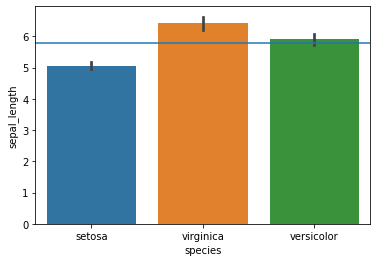

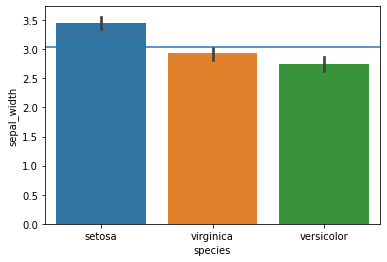

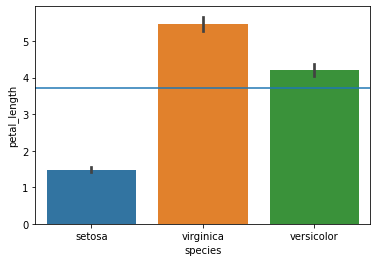

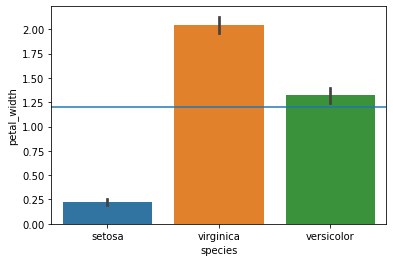

In [103]:
for col in quantitative_cols:
    sns.barplot(x='species', y=col, data=train)
    plt.axhline(train[col].mean())
    plt.show()

b. For each measurement type, compute the descriptive statistics for each species.

In [109]:
species = ['setosa','virginica','versicolor']
for sp in species:
    for col in quantitative_cols:
        print(f'{sp}, {col}\n{train[col][train.species == sp].describe()}\n')

setosa, sepal_length
count    28.000000
mean      5.064286
std       0.330224
min       4.400000
25%       4.800000
50%       5.050000
75%       5.225000
max       5.800000
Name: sepal_length, dtype: float64

setosa, sepal_width
count    28.000000
mean      3.457143
std       0.310828
min       2.900000
25%       3.200000
50%       3.400000
75%       3.700000
max       4.100000
Name: sepal_width, dtype: float64

setosa, petal_length
count    28.000000
mean      1.475000
std       0.193649
min       1.000000
25%       1.400000
50%       1.500000
75%       1.525000
max       1.900000
Name: petal_length, dtype: float64

setosa, petal_width
count    28.000000
mean      0.221429
std       0.078680
min       0.100000
25%       0.200000
50%       0.200000
75%       0.200000
max       0.400000
Name: petal_width, dtype: float64

virginica, sepal_length
count    28.000000
mean      6.414286
std       0.577167
min       4.900000
25%       6.075000
50%       6.400000
75%       6.700000
max       7

In [121]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
34,setosa,4.9,3.1,1.5,0.2,1,0,0
144,virginica,6.7,3.3,5.7,2.5,0,0,1
111,virginica,6.4,2.7,5.3,1.9,0,0,1
136,virginica,6.3,3.4,5.6,2.4,0,0,1
35,setosa,5.0,3.2,1.2,0.2,1,0,0


c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [116]:
virginica = train[train.species=='virginica']
versicolor = train[train.species=='versicolor']

Petal Width
Null Hypothesis: There is no significant difference between the petal widths of the virginica and versicolor species.
Alternate Hypothesis: There is a significant difference between the petal widths of the virginica and versicolor species.
Result: We reject the null hypothesis.

In [120]:
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width)
t,p

(5.0, 1.024136742049331e-10)

Petal Length
Null Hypothesis: There is no significant difference between the petal lengths of the virginica and versicolor species.
Alternate Hypothesis: There is a significant difference between the petal lengths of the virginica and versicolor species.
Result: We reject the null hypothesis.

In [122]:
t, p = stats.mannwhitneyu(virginica.petal_length, versicolor.petal_length)
t,p

(13.5, 2.7787033672983343e-10)

Sepal Length
Null Hypothesis: There is no significant difference between the sepal lengths of the virginica and versicolor species.
Alternate Hypothesis: There is a significant difference between the sepal lengths of the virginica and versicolor species.
Result: We reject the null hypothesis.

In [123]:
t, p = stats.mannwhitneyu(virginica.sepal_length, versicolor.sepal_length)
t,p

(186.0, 0.0003682231628117784)

Sepal Width
Null Hypothesis: There is no significant difference between the sepal widths of the virginica and versicolor species.
Alternate Hypothesis: There is a significant difference between the sepal widths of the virginica and versicolor species.
Result: We reject the null hypothesis.

In [124]:
t, p = stats.mannwhitneyu(virginica.sepal_width, versicolor.sepal_width)
t,p

(275.0, 0.0270359692066584)

d. Document takeaways & any actions.

**Takeaways & Actions**
- Sepal length & sepal width across all species are fairly close to the mean
- Setosa petal length and width are quite lower than the mean while virginica petal length and width are quite a bit higher than the mean
- Testing shows that the differences in petal length and width and sepal length and width are significant between the versicolor and virginica species with differences between petal lengths and widths more significant than those between sepal lengths and widths

**4. Multivariate Stats**

a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

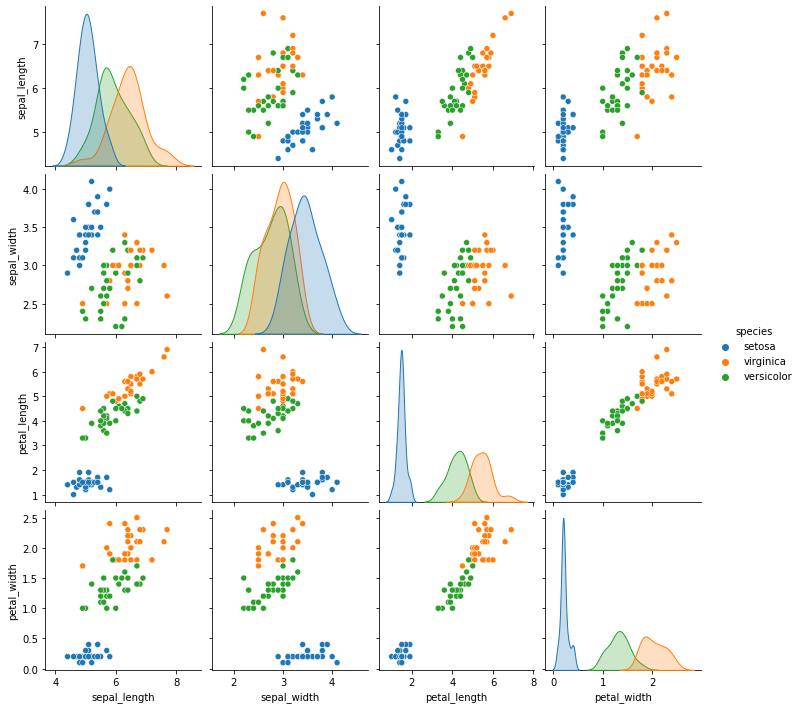

In [129]:
sns.pairplot(train, vars=quantitative_cols, hue='species')

b. Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

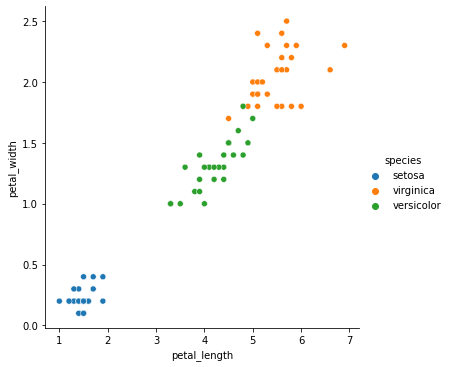

In [130]:
sns.relplot(x='petal_length', y='petal_width', data=train, hue="species")

### Ignoring for now per instructions
c. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

d. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance)

**Is the ratio of sepal length to width significantly different in virginica compared to versicolor?**

Null Hypothesis: There is no significant difference in the ratio of sepal length to width in virginica as compared to versicolor.

Alternate Hypothesis: There is a significant difference in the ratio of sepal length to width in virginica as compared to versicolor.

Results: We fail to reject the null hypothesis

In [133]:
train['sepal_lw_ratio'] = (train.sepal_length / train.sepal_width)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_lw_ratio
34,setosa,4.9,3.1,1.5,0.2,1,0,0,1.580645
144,virginica,6.7,3.3,5.7,2.5,0,0,1,2.030303
111,virginica,6.4,2.7,5.3,1.9,0,0,1,2.370370
136,virginica,6.3,3.4,5.6,2.4,0,0,1,1.852941
35,setosa,5.0,3.2,1.2,0.2,1,0,0,1.562500


In [142]:
subset_df = train[train.species.isin(['virginica','versicolor'])]
subset_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_lw_ratio
144,virginica,6.7,3.3,5.7,2.5,0,0,1,2.030303
111,virginica,6.4,2.7,5.3,1.9,0,0,1,2.370370
136,virginica,6.3,3.4,5.6,2.4,0,0,1,1.852941
114,virginica,5.8,2.8,5.1,2.4,0,0,1,2.071429
103,virginica,6.3,2.9,5.6,1.8,0,0,1,2.172414


<AxesSubplot:xlabel='species', ylabel='sepal_lw_ratio'>

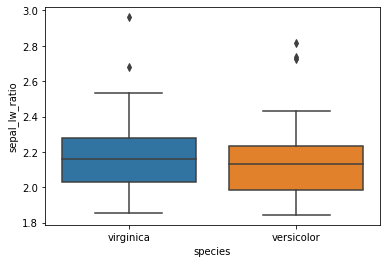

In [143]:
sns.boxplot(x="species", y="sepal_lw_ratio", data=subset_df)

In [153]:
x = subset_df.sepal_lw_ratio[subset_df.species == 'virginica']
y = subset_df.sepal_lw_ratio[subset_df.species == 'versicolor']
x.var(), y.var()

(0.05706199106629714, 0.06856465641095046)

In [157]:
stats.levene(x,y)

LeveneResult(statistic=0.3756679779895122, pvalue=0.5425036979887639)

<AxesSubplot:xlabel='sepal_lw_ratio', ylabel='Density'>

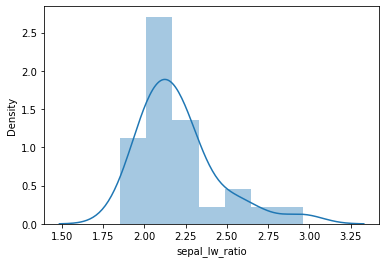

In [164]:
sns.distplot(x)

<AxesSubplot:xlabel='sepal_lw_ratio', ylabel='Density'>

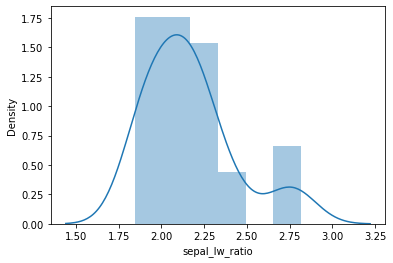

In [163]:
sns.distplot(y)

In [165]:
t,p = stats.ttest_ind(x,y)
t,p

(0.5702053942624661, 0.5709033653427009)

e. Document takeaways and any actions.

- Petal length and width seem to be the best indicators of species.
- Setosa petal lengths and widths are quite different whereas virginica and versicolor do still have some overlap

## Exploratory Analysis Exercises Part II

**Explore your titanic dataset more completely.**

a. Determine drivers of the target variable

b. Determine if certain columns should be dropped

c. Determine if it would be valuable to bin some numeric columns

d. Determine if it would be valuable to combine multiple columns into one.

e. Does it make sense to combine any features?

f. Do you find any surprises?

g. Document any and all findings and takeaways in your notebook using markdown.

## Exploratory Analysis Exercises Part III

a. Explore your telco data to discover drivers of churn

b. Determine if certain columns should be dropped

c. Determine if it would be valuable to bin some numeric columns

d. Determine if it would be valuable to combine multiple columns into one.

e. What are your drivers of churn?

f. Does it make sense to combine any features?

g. Do you find any surprises?

h. Document any and all findings and takeaways in your notebook using markdown.